# K Nearest Neighbour and Elbow Curve

In this notebook, we will implement K nearest neighbour using same dataset as simple nearest neighbour, and also draw elbow curve while finding error for different value of k using 10 fold cross validation.

## 1 MNIST Data Set

We will use MNIST, a classic machine learning dataset, consisting of 28x28 grayscale images of handwritten digits. The original training set contains 60,000 examples, and the test set contains 10,000 examples. In this notebook, we will be working with a subset of this data: a training set of 7,500 examples and a test set of 1,000 examples.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time

In [52]:
# Loading Training Data
train_data = np.load("C:/Users/itsrh/Desktop/ML Model Datasets/MNIST/train_data.npy")
train_labels = np.load('C:/Users/itsrh/Desktop/ML Model Datasets/MNIST/train_labels.npy')

# Loading Training Data
test_data = np.load("C:/Users/itsrh/Desktop/ML Model Datasets/MNIST/test_data.npy")
test_labels = np.load('C:/Users/itsrh/Desktop/ML Model Datasets/MNIST/test_labels.npy')

In [53]:
# Printing Dimension of Training and Testing Data
print(f'Training Data Dimension: {np.shape(train_data)}')
print(f'Number of Training Labels: {len(train_labels)}')
print(f'Testing Data Dimension: {np.shape(test_data)}')
print(f'Number of Testing Labels: {len(test_labels)}')

Training Data Dimension: (7500, 784)
Number of Training Labels: 7500
Testing Data Dimension: (1000, 784)
Number of Testing Labels: 1000


In [54]:
# Printing no of examples of each digit.
train_digits, train_count = np.unique(train_labels, return_counts = True)
print('Training Data Distribution')
print(dict(zip(train_digits,train_count)))

test_digits, test_count = np.unique(test_labels, return_counts = True)
print('Test Data Distribution')
print(dict(zip(test_digits, test_count)))

Training Data Distribution
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Test Data Distribution
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


## 2. Visualizing the data
Each data point is stored as 784-dimensional vector. To visualize a data point, we first reshape it to a 28x28 image.

In [55]:
# Define a function that displays a digit given in its vector form
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape(28,28), cmap = plt.cm.gray)
    plt.show()
    return

# Define a function that takes the index of a particular data set, "test" or "train", and displays that image.
def vis_image(index, data_set = 'train'):
    if data_set == 'train':
        show_digit(train_data[index])
        label = train_labels[index]
    else:
        show_digit(test_data[index])
        label = test_labels[index]
    print(f'Label: {label}')
    return

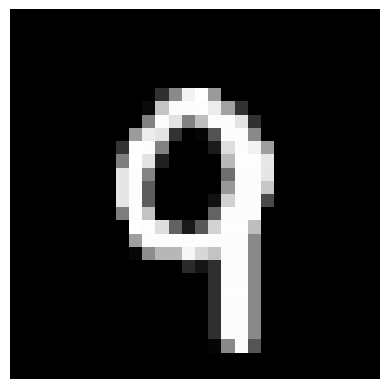

Label: 9


In [56]:
# view the first data point of the training data
vis_image(0)

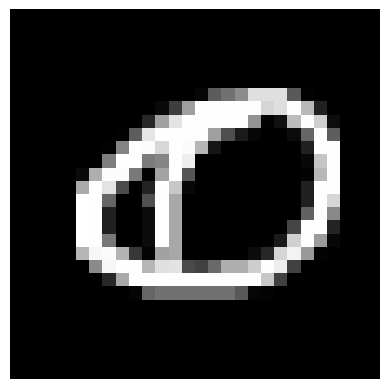

Label: 0


In [57]:
# view the first data point of the test data
vis_image(0, 'test')

## 3. Squared Euclidean distance

To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. A natural distance function is _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Often we omit the square root, and simply compute _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
For the purposes of nearest neighbor computations, the two are equivalent: for three vectors $x, y, z \in \mathbb{R}^d$, we have $\|x - y\| \leq \|x - z\|$ if and only if $\|x - y\|^2 \leq \|x - z\|^2$.

Now we just need to be able to compute squared Euclidean distance. The following function does so.

In [58]:
# Function to compute squared Euclidean distance between two vectors.
def squared_dist(x,y):
    return np.sum(np.square(x-y))

## Compute distance between a seven and a one in our training set.
print("Distance from 7 to 1: ", squared_dist(train_data[4],train_data[5]))

## Compute distance between a seven and a two in our training set.
print("Distance from 7 to 2: ", squared_dist(train_data[4],train_data[1]))

## Compute distance between two seven's in our training set.
print("Distance from 7 to 7: ", squared_dist(train_data[4],train_data[7]))

Distance from 7 to 1:  5357193.0
Distance from 7 to 2:  12451684.0
Distance from 7 to 7:  5223403.0


## 4. Computing k nearest neighbours

In [76]:
# Function that takes a vector x, and returns its distance from all the points in the training set.
def distance_array(x):
    distance = []
    for i in train_data:
        distance.append(squared_dist(x,i))
    return distance
    
# Function that takes a vector **x** and a positive integer **k**, and returns the label of the majority of its **k nearest neighbours.
def KNN_classifier(x, k):
    distance = distance_array(x)
    if k > len(distance):
        print('K Value Larger than Data Size.')
        return
    indexes = np.argsort(distance)[:k]
    labels = [train_labels[index] for index in indexes]

    counts = Counter(labels)
    max_count = max(counts.values())

    # Get all labels that have maximum frequency
    candidates = [label for label, count in counts.items() if count == max_count]

    # Choose the smallest label (sklearn behaviour)
    return min(candidates)

A Success Case.
KNN Clasification: 0
True Label: 0
True Image of Test Data


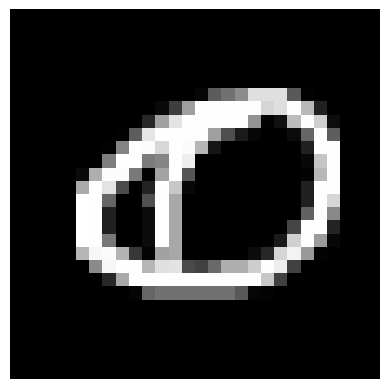

Label: 0


In [77]:
# 3-NN Classification of a case that a simple NN Classifier previously classified correctly.
print('A Success Case.')
print('KNN Clasification:',KNN_classifier(test_data[0],3))
print('True Label:',test_labels[0])
print('True Image of Test Data')
vis_image(0, 'test')

A Failure Case.
KNN Clasification: 3
True Label: 3
True Image of Test Data


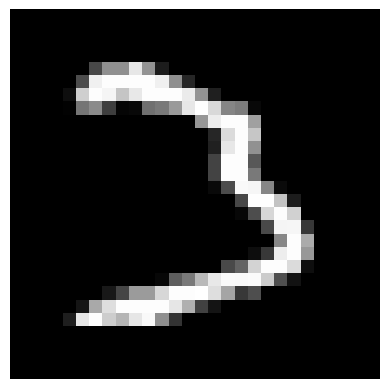

Label: 3


In [78]:
# 3-NN Classification of a case that a simple NN Classifier previously misclassified.
print('A Failure Case.')
print('KNN Clasification:',KNN_classifier(test_data[39],3))
print('True Label:',test_labels[39])
print('True Image of Test Data')
vis_image(39, 'test')

Classification of Test Digit 100.
3 NN Clasification: 8
True Label: 8
True Image of Test Data


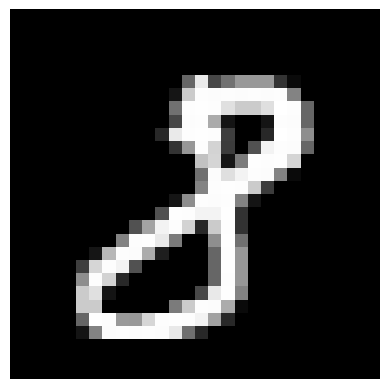

Label: 8


In [79]:
# 3-NN Classification of Test Digit 100
print('Classification of Test Digit 100.')
print('3 NN Clasification:',KNN_classifier(test_data[99],3))
print('True Label:',test_labels[99])
print('True Image of Test Data')
vis_image(99, 'test')

## 6. Processing the full test set

Now let's apply our nearest neighbour classifier over the full data set, and calculate the time it takes to complete the process.


In [80]:
t1 = time.time()
test_predictions = [KNN_classifier(i,3) for i in test_data]
num_error = np.not_equal(test_predictions,test_labels)
error = np.sum(num_error)/len(test_labels)
t2 = time.time()
print('Error of NN Classifier: ',error)
print('Classification time (seconds)',t2-t1)

Error of NN Classifier:  0.052
Classification time (seconds) 128.577495098114


## Finding optimal K using Elbow Curve
As we can see, using 3-NN classification reduces the error rate, but not much (about .2%), so we will now use modified 10-fold cross-validation and the elbow curve to find the optimal k value. We will start with k = 1, and for each k, randomly divide the datasets into 10 folds, using 9 folds for training and 1 fold for testing. We will then find the error in classifying the 10th fold, and we will consequently increase the value of k by 1 for k = 1 to 10. # We will use sklean KNN classifier as our brute force one will take a lot more time. We will also plot the error for each k with est data, and comapare the curves

In [64]:
k_values = range(1, 11)
cv_errors = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, train_data, train_labels, cv=10)
    error = 1 - scores.mean()
    cv_errors.append(error)

print(cv_errors)

[0.05400000000000005, 0.07346666666666657, 0.05906666666666671, 0.05906666666666671, 0.060933333333333395, 0.06253333333333333, 0.06573333333333342, 0.06573333333333342, 0.06586666666666674, 0.06773333333333331]


In [65]:
test_errors = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    error = np.mean(predictions != test_labels)
    test_errors.append(error)
print(test_errors)

[0.046, 0.059, 0.052, 0.053, 0.049, 0.056, 0.057, 0.058, 0.058, 0.061]


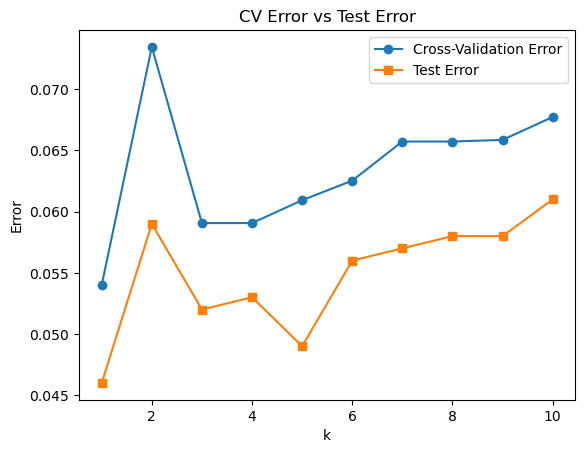

In [66]:
plt.plot(k_values, cv_errors, marker='o', label='Cross-Validation Error')
plt.plot(k_values, test_errors, marker='s', label='Test Error')

plt.xlabel("k")
plt.ylabel("Error")
plt.title("CV Error vs Test Error")
plt.legend()
plt.show()